In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


In [ ]:
!pip install scikit-learn==1.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 84.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('mushrooms.csv')


In [ ]:
#print column names
column_names = df.columns.tolist()
print(column_names)
#print number of columns
print(len(column_names))

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
23


In [ ]:
#get list of empty columns
empty_values_count = df.isnull().sum()
print(empty_values_count)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# Data types of each column
column_data_types = df.dtypes
print(column_data_types)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [ ]:
num_rows = len(df)
num_columns = len(df.columns)

print("\nData Information:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Data Information:
Number of rows: 8124
Number of columns: 23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
object_columns = df.select_dtypes(include='object').columns
distinct_values = {}

for column in object_columns:
    distinct_values[column] = df[column].unique()

for column, values in distinct_values.items():
    print(f"Column '{column}':")
    print(values)
    print()

Column 'class':
['p' 'e']

Column 'cap-shape':
['x' 'b' 's' 'f' 'k' 'c']

Column 'cap-surface':
['s' 'y' 'f' 'g']

Column 'cap-color':
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Column 'bruises':
['t' 'f']

Column 'odor':
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Column 'gill-attachment':
['f' 'a']

Column 'gill-spacing':
['c' 'w']

Column 'gill-size':
['n' 'b']

Column 'gill-color':
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Column 'stalk-shape':
['e' 't']

Column 'stalk-root':
['e' 'c' 'b' 'r' '?']

Column 'stalk-surface-above-ring':
['s' 'f' 'k' 'y']

Column 'stalk-surface-below-ring':
['s' 'f' 'y' 'k']

Column 'stalk-color-above-ring':
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Column 'stalk-color-below-ring':
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

Column 'veil-type':
['p']

Column 'veil-color':
['w' 'n' 'o' 'y']

Column 'ring-number':
['o' 't' 'n']

Column 'ring-type':
['p' 'e' 'l' 'f' 'n']

Column 'spore-print-color':
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

Column 'population':
[

In [ ]:
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Chi Square Test

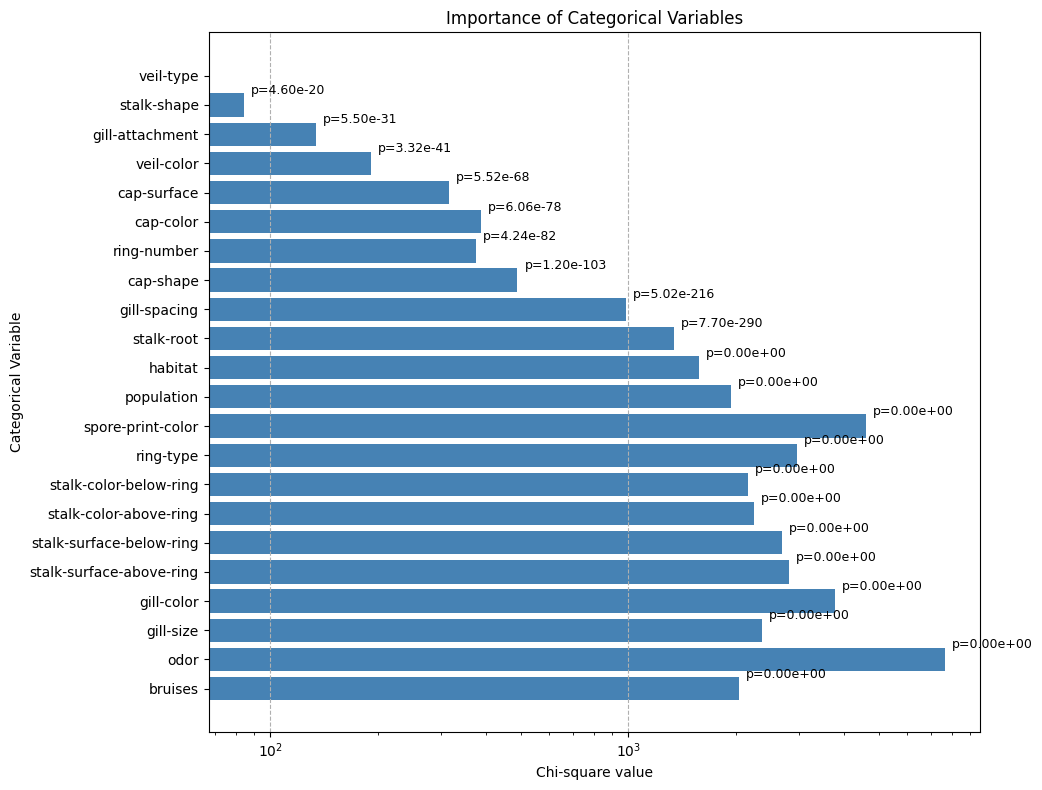

In [ ]:
#All categorical variabless
categorical_vars = [ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] # Replace with your categorical variable names
target_var = 'class'

chi2_results = []

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df[target_var])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((var, chi2, p_value))

#sort the chi-square resulT by pvalue in ascEnding order
chi2_results.sort(key=lambda x: x[2])
variables=[]
chi2_values=[]
p_values=[]

#Append the result in array
for var, chi2, p_value in chi2_results:
    variables.append(var)
    chi2_values.append(chi2)
    p_values.append(p_value)

plt.figure(figsize=(10, 8))
plt.barh(variables, chi2_values, color='steelblue')
plt.xlabel('Chi-square value')
plt.ylabel('Categorical Variable')
plt.title('Importance of Categorical Variables')
plt.xscale('log')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Add annotations for p-values
for i, value in enumerate(p_values):
    plt.annotate(f'p={value:.2e}', (chi2_values[i], i), xytext=(5, 8), textcoords='offset points', fontsize=9)

plt.show()

In [ ]:
newDf = df[["class",'odor', 'spore-print-color', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type']]




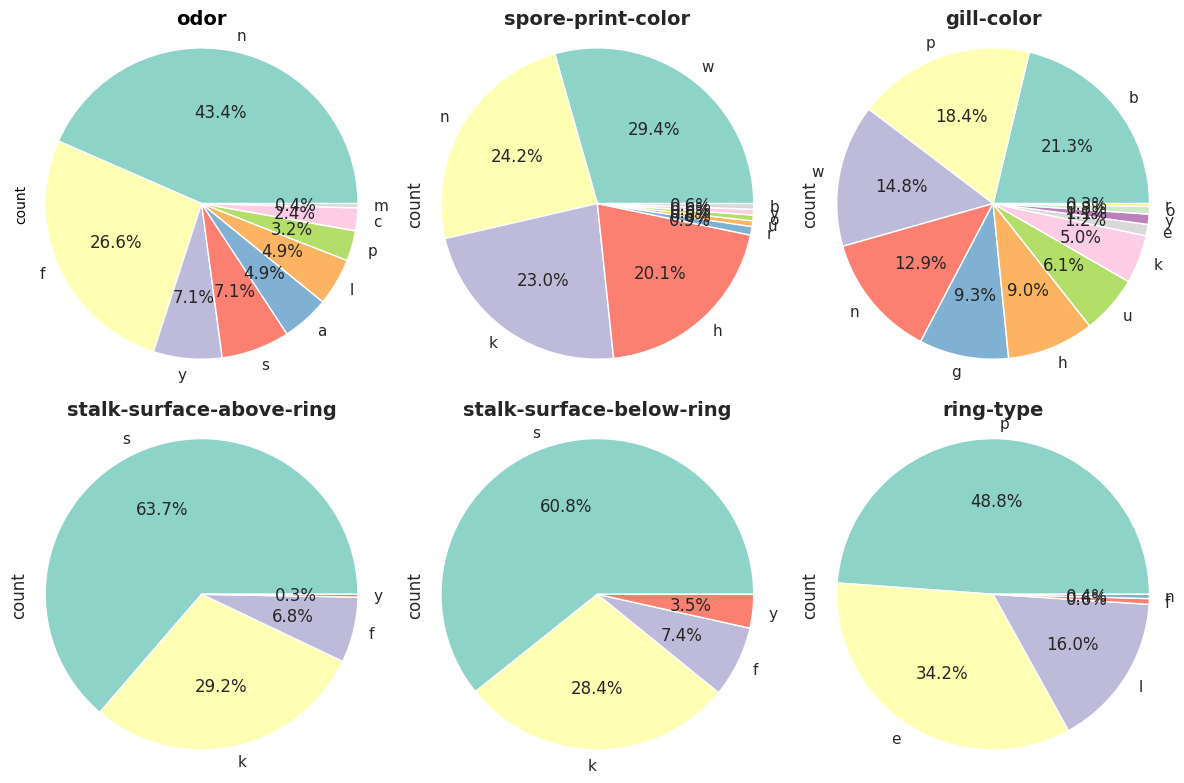

In [ ]:
columns = ['odor', 'spore-print-color', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    sns.set(style="darkgrid")
    colors = sns.color_palette('Set3', len(newDf[column].unique()))
    newDf[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
    plt.title(column, fontsize=14, fontweight='bold')
    plt.axis('equal')

plt.tight_layout()

plt.show()

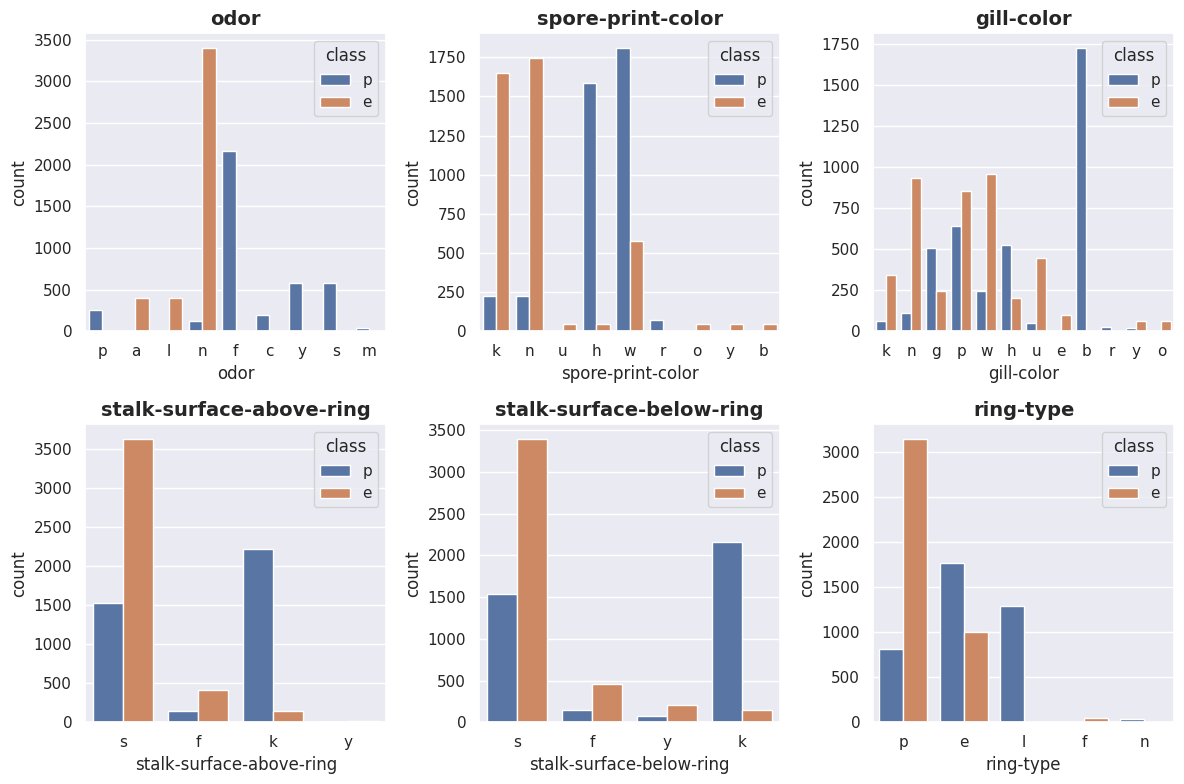

In [ ]:
columns = ['odor', 'spore-print-color', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='class', data=newDf)
    plt.title(column, fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

Encoding


In [ ]:
def label_encode_categorical(df):
    # Create a new DataFrame to store the encoded data
    encoded_df = pd.DataFrame()

    # Create a dictionary to store the mapping of encoded values to original categorical values
    encoding_mapping = {}

    # Iterate over each column in the original DataFrame
    for column in df.columns:
        # Check if the column data type is object (categorical)

        if df[column].dtype == object:
            # Create a new instance of LabelEncoder for each column
            label_encoder = LabelEncoder()
            # Fit and transform the column data to label-encoded values
            encoded_column = label_encoder.fit_transform(df[column])
            # Add the encoded column to the new DataFrame
            encoded_df[column] = encoded_column
            # Store the mapping of encoded values to original categorical values
            encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        else:
            # For non-categorical columns, simply copy the values to the new DataFrame
            encoded_df[column] = df[column]

    # Return both the original DataFrame and the encoded DataFrame along with the encoding mapping
    return encoded_df, df, encoding_mapping

In [ ]:
encoded_df, original_df , encoding_mapping = label_encode_categorical(newDf)
print(encoding_mapping)

{'class': {'e': 0, 'p': 1}, 'odor': {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}, 'spore-print-color': {'b': 0, 'h': 1, 'k': 2, 'n': 3, 'o': 4, 'r': 5, 'u': 6, 'w': 7, 'y': 8}, 'gill-color': {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}, 'stalk-surface-above-ring': {'f': 0, 'k': 1, 's': 2, 'y': 3}, 'stalk-surface-below-ring': {'f': 0, 'k': 1, 's': 2, 'y': 3}, 'ring-type': {'e': 0, 'f': 1, 'l': 2, 'n': 3, 'p': 4}}


Dropping Class from the Data


In [ ]:
y = encoded_df[["class"]]
x = encoded_df.drop(['class'], axis=1)

Splitting Data

In [ ]:
# Splitting the data into 70% train, 25% test, and 5% validation
train_data, temp_data, train_labels, temp_labels = train_test_split(x, y, test_size=0.3, random_state=42)
test_data, val_data, test_labels, val_labels = train_test_split(temp_data, temp_labels, test_size=0.17, random_state=42)

# Print the shapes of the resulting datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)

Train data shape: (5686, 6)
Test data shape: (2023, 6)
Validation data shape: (415, 6)


In [ ]:
import joblib

def try_algorithms(X_train, X_val, X_test, y_train, y_val, y_test):
    # Define the algorithms to try
    algorithms = {
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    # Train and evaluate each algorithm
    results = {}
    saved_models = {}  # Dictionary to store the saved models

    for algorithm_name, algorithm in algorithms.items():
        # Perform cross-validation
        cv_scores = cross_val_score(algorithm, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), cv=5)
        cv_accuracy = np.mean(cv_scores)

        # Train the algorithm on the combined training and validation data
        algorithm.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

        # Save the trained model
        model_filename = algorithm_name.replace(" ", "_").lower() + "_model.pkl"
        joblib.dump(algorithm, model_filename)

        # Store the saved model in the dictionary
        saved_models[algorithm_name] = model_filename

        # Evaluate on the test set
        y_pred_test = algorithm.predict(X_test)

        # Calculate metrics
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        results[algorithm_name] = {
            "Cross-Validation Accuracy": cv_accuracy,
            "Test Accuracy": accuracy_test,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }

    # Visualize the results
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(results.keys()), y=[result["Cross-Validation Accuracy"] for result in results.values()])
    plt.xlabel("Algorithm")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Different Algorithms (Cross-Validation)")
    plt.xticks(rotation=45)
    plt.show()

    return results, saved_models

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

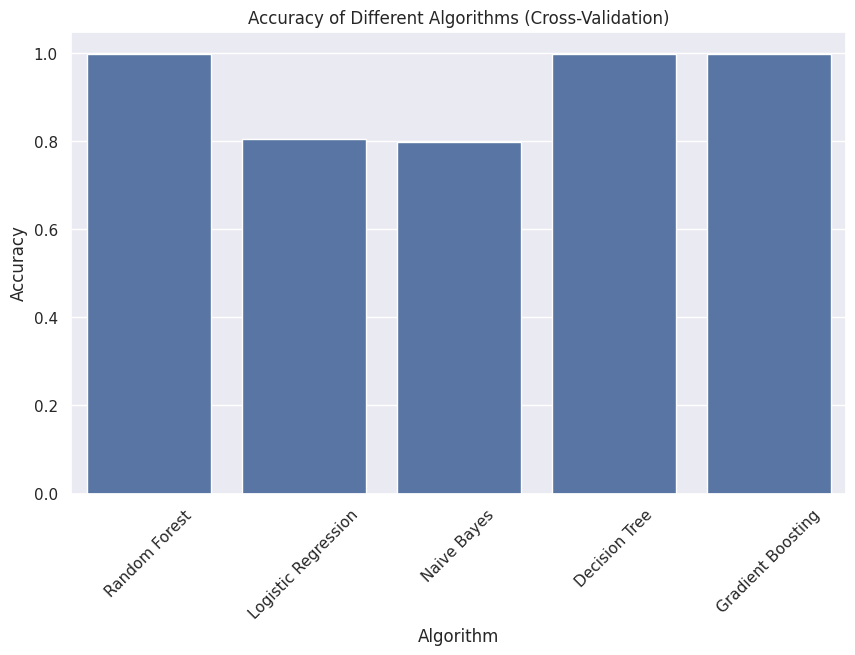

{'Random Forest': {'Cross-Validation Accuracy': 0.9990163934426229, 'Test Accuracy': 0.9990113692535838, 'Precision': 1.0, 'Recall': 0.9979550102249489, 'F1 Score': 0.9989764585465711}, 'Logistic Regression': {'Cross-Validation Accuracy': 0.8056049193754111, 'Test Accuracy': 0.8017795353435492, 'Precision': 0.7734597156398104, 'Recall': 0.8343558282208589, 'F1 Score': 0.8027545499262174}, 'Naive Bayes': {'Cross-Validation Accuracy': 0.7980639357688538, 'Test Accuracy': 0.8012852199703411, 'Precision': 0.789738430583501, 'Recall': 0.8026584867075665, 'F1 Score': 0.7961460446247465}, 'Decision Tree': {'Cross-Validation Accuracy': 0.9990163934426229, 'Test Accuracy': 0.9990113692535838, 'Precision': 1.0, 'Recall': 0.9979550102249489, 'F1 Score': 0.9989764585465711}, 'Gradient Boosting': {'Cross-Validation Accuracy': 0.9990163934426229, 'Test Accuracy': 0.9990113692535838, 'Precision': 1.0, 'Recall': 0.9979550102249489, 'F1 Score': 0.9989764585465711}}


In [ ]:
results , _ = try_algorithms(train_data,val_data, test_data, train_labels,val_labels, test_labels)
print(results)